In [1]:
import pandas as pd
import numpy as np
from keras import regularizers

# call data

In [2]:
df = pd.read_csv('compresive_strength_concrete.csv')

# empty or nul values

In [3]:
display(np.where(pd.isnull(df)))
display(np.where(df.empty))

(array([], dtype=int64), array([], dtype=int64))

(array([], dtype=int64),)

# convert to float

In [4]:
df.shape

(1030, 9)

In [5]:
data=df.astype('float64')

In [6]:
data.dtypes

Cement (component 1)(kg in a m^3 mixture)                float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    float64
Fly Ash (component 3)(kg in a m^3 mixture)               float64
Water  (component 4)(kg in a m^3 mixture)                float64
Superplasticizer (component 5)(kg in a m^3 mixture)      float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        float64
Age (day)                                                float64
Concrete compressive strength(MPa, megapascals)          float64
dtype: object

# normalizing  and shuffling

In [7]:
mean=data.mean(axis=0)
data= data-mean
std=data.std(axis=0)
data=data/std

np.random.seed(77)
shuf=np.random.randint(0,len(data),len(data)) 
display(shuf.max())
data=data.iloc[shuf]
display(data)

1028

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
727,0.476834,-0.856472,-0.846733,0.488555,-1.038638,0.669819,0.591443,-0.612034,-1.100098
607,-0.432202,-0.856472,-0.846733,0.582214,-1.038638,-0.063263,1.389687,-0.279597,-1.041436
235,-0.644629,0.280533,-0.463902,0.006215,0.082918,1.197123,0.148667,-0.501222,-1.076155
927,-1.188137,1.623844,1.528379,0.863189,0.467930,-1.979564,-0.867847,-0.279597,-0.165689
736,-0.413064,-0.856472,-0.846733,0.207580,-1.038638,1.878761,0.192321,-0.612034,-1.422742
...,...,...,...,...,...,...,...,...,...
943,-1.239808,-0.856472,0.901787,0.132654,0.283794,0.245403,0.527833,-0.279597,-1.414960
815,2.333180,-0.856472,-0.846733,0.348068,-1.038638,1.955927,-2.002850,-0.675355,-0.120794
986,-0.080070,0.361664,0.431452,1.317431,0.467930,-0.886372,-1.170930,-0.279597,0.080933
24,0.945704,-0.856472,-0.846733,2.174405,-1.038638,-0.526262,-1.291914,5.055221,0.999778


# training and test data split

In [8]:
train_data=data[0:825] 
display(train_data)
train_targets=train_data.iloc[0:825,[8]] 
train_data=train_data.drop(['Concrete compressive strength(MPa, megapascals) '],axis=1)

test_data=data[826:1030]
test_targets=test_data.iloc[0:204,[8]]
display(test_data)
test_data=test_data.drop(['Concrete compressive strength(MPa, megapascals) '],axis=1)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
727,0.476834,-0.856472,-0.846733,0.488555,-1.038638,0.669819,0.591443,-0.612034,-1.100098
607,-0.432202,-0.856472,-0.846733,0.582214,-1.038638,-0.063263,1.389687,-0.279597,-1.041436
235,-0.644629,0.280533,-0.463902,0.006215,0.082918,1.197123,0.148667,-0.501222,-1.076155
927,-1.188137,1.623844,1.528379,0.863189,0.467930,-1.979564,-0.867847,-0.279597,-0.165689
736,-0.413064,-0.856472,-0.846733,0.207580,-1.038638,1.878761,0.192321,-0.612034,-1.422742
...,...,...,...,...,...,...,...,...,...
880,-1.235981,-0.856472,0.903349,0.113922,0.300534,0.245403,0.529080,-0.279597,-1.414960
25,0.945704,-0.856472,-0.846733,2.174405,-1.038638,-0.526262,-1.291914,3.551340,1.046469
118,1.376300,0.375573,-0.846733,-1.314367,1.723404,-1.553862,1.415879,-0.279597,1.464888
564,-1.170913,1.904328,-0.846733,0.193532,-1.038638,0.870452,-0.489928,-0.279597,-0.882808


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
334,-0.058062,-0.856472,1.050231,-1.033392,0.618587,1.037646,0.048886,-0.675355,-0.719391
357,-0.037968,0.277056,-0.463902,-0.977197,0.836202,1.141821,0.111249,0.163652,1.855771
868,-0.049450,0.487998,0.559583,-0.073394,0.467930,-1.323649,-0.069603,-0.279597,0.506535
240,-0.492485,-0.856472,1.000229,0.638409,-0.017520,0.709688,-0.199318,-0.501222,-0.807983
897,0.027100,0.534359,-0.846733,-0.635344,0.133137,-0.037541,0.254684,-0.279597,0.306005
...,...,...,...,...,...,...,...,...,...
943,-1.239808,-0.856472,0.901787,0.132654,0.283794,0.245403,0.527833,-0.279597,-1.414960
815,2.333180,-0.856472,-0.846733,0.348068,-1.038638,1.955927,-2.002850,-0.675355,-0.120794
986,-0.080070,0.361664,0.431452,1.317431,0.467930,-0.886372,-1.170930,-0.279597,0.080933
24,0.945704,-0.856472,-0.846733,2.174405,-1.038638,-0.526262,-1.291914,5.055221,0.999778


# Network initialization

In [9]:
from keras import models
from keras import layers
from keras import regularizers
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(10, activation='relu',kernel_regularizer=regularizers.l2(0.001),input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(9, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dense(8, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

# K-fold validation

In [10]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 200
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],train_targets[(i + 1) * num_val_samples:]],axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,validation_data=(val_data, val_targets),epochs=num_epochs, batch_size=10, verbose=0)
    mae_history = history.history['mae']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [11]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

# mean absolute error with epochs

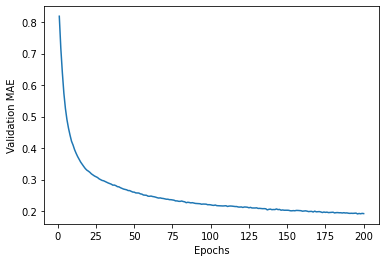

In [12]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

# training and validation loss

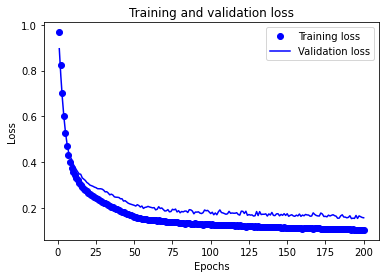

In [13]:

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, 200 + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# rebuild model using all data set

In [14]:
model = build_model()
model.fit(train_data, train_targets,
epochs=200, batch_size=10, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

7/7 [==============================] - 0s 2ms/step - loss: 0.1215 - mae: 0.2298


# testing accuracy of data by taking sample value

In [15]:
c=np.array(test_data.iloc[12])
a=c.reshape(1,8)
display(a)
display(test_data.iloc[25])

array([[-0.2848426 , -0.85647182,  1.00179143,  0.53070162, -0.06773869,
         0.90903503, -0.24047708, -0.50122179]])

Cement (component 1)(kg in a m^3 mixture)               -0.930736
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0.564494
Fly Ash (component 3)(kg in a m^3 mixture)              -0.846733
Water  (component 4)(kg in a m^3 mixture)                1.027091
Superplasticizer (component 5)(kg in a m^3 mixture)     -1.038638
Coarse Aggregate  (component 6)(kg in a m^3 mixture)    -0.176440
Fine Aggregate (component 7)(kg in a m^3 mixture)        0.329519
Age (day)                                               -0.675355
Name: 651, dtype: float64

In [16]:
test_targets.iloc[12]

Concrete compressive strength(MPa, megapascals)    -0.90316
Name: 431, dtype: float64

In [17]:
model.predict(a)

array([[-0.9403729]], dtype=float32)